In [1]:
import pandas as pd
import imblearn
import numpy as np
import traceback
from dateutil.parser import parse
pd.set_option('display.max_rows', 20,'max_info_columns', 9999,'display.max_columns', 9999)
import matplotlib.pyplot as plt
import copy
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing,metrics
import datetime as dt
import gc
from sklearn import svm,linear_model
from collections import Counter
from sklearn.model_selection import train_test_split
import csv
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder,Imputer

from sklearn.ensemble import RandomForestRegressor,VotingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedKFold


from sklearn.feature_selection import RFE 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
import xlrd
warnings.filterwarnings('ignore')

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
train=pd.read_table('/home/tsl-yu/文档/天池-盐城-上牌量预测/data/train_20171215.txt')
test=pd.read_table('/home/tsl-yu/文档/天池-盐城-上牌量预测/data/test_A_20171225.txt')
sample=pd.read_table('/home/tsl-yu/文档/天池-盐城-上牌量预测/data/sample_A_20171225.txt',names='s')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 4 columns):
date           4773 non-null int64
day_of_week    4773 non-null int64
brand          4773 non-null int64
cnt            4773 non-null int64
dtypes: int64(4)
memory usage: 149.2 KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
date           276 non-null int64
day_of_week    276 non-null int64
dtypes: int64(2)
memory usage: 4.4 KB


In [24]:
train = train.groupby(['date','day_of_week'], as_index=False)['cnt'].agg({'label':np.sum})

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1031
Data columns (total 3 columns):
date           1032 non-null int64
day_of_week    1032 non-null int64
label          1032 non-null int64
dtypes: int64(3)
memory usage: 72.2 KB


## 数据分析 

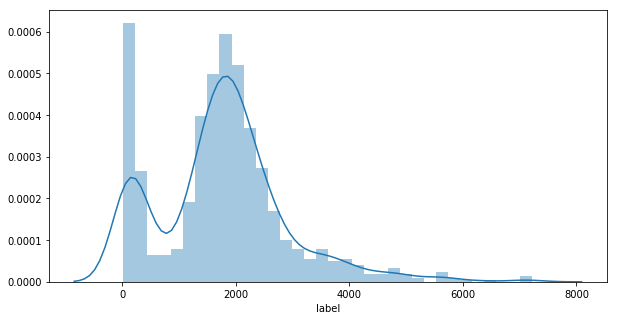

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(train['label'])

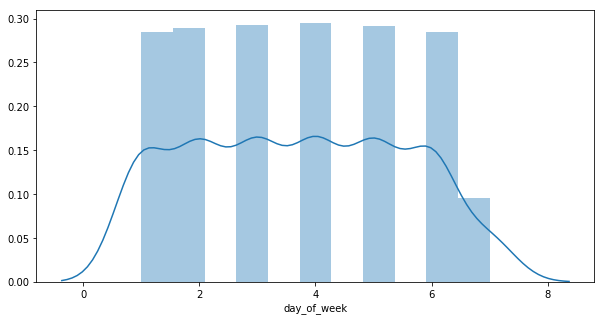

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(train['day_of_week'])

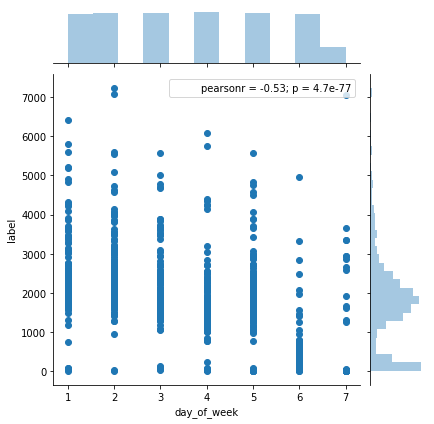

In [33]:
plt.figure(figsize=(10,5))
sns.jointplot(train['day_of_week'],train['label'])

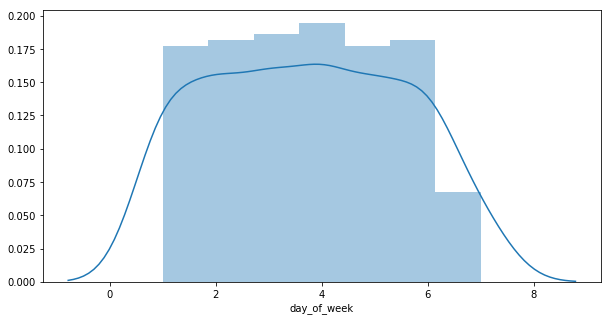

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(test['day_of_week'])

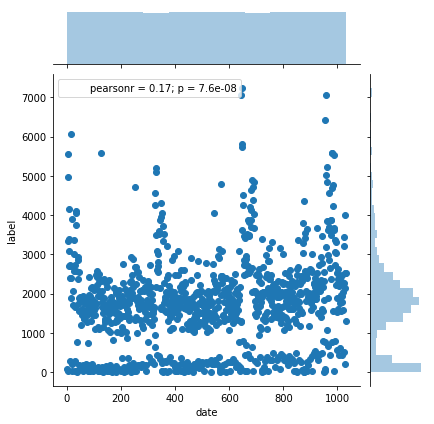

In [35]:
plt.figure(figsize=(10,5))
sns.jointplot(train['date'],train['label'])

In [ ]:
test_A[['date','result']].to_csv('data/result.txt',index=False,header=False,sep='\t')